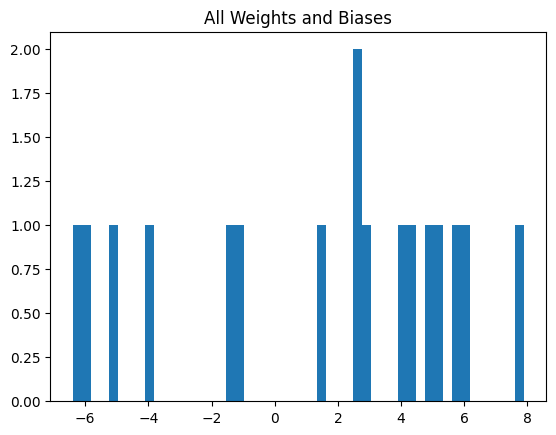

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class NeuralNetwork:
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_outputs):
        self.n_inputs = n_inputs
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_outputs = n_outputs

        self.weights1 = np.random.rand(n_inputs, n_hidden1)
        self.biases1 = np.zeros((1, n_hidden1))

        self.weights2 = np.random.rand(n_hidden1, n_hidden2)
        self.biases2 = np.zeros((1, n_hidden2))

        self.weights3 = np.random.rand(n_hidden2, n_outputs)
        self.biases3 = np.zeros((1, n_outputs))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, inputs):
        hidden1 = self.sigmoid(np.dot(inputs, self.weights1) + self.biases1)
        hidden2 = self.sigmoid(np.dot(hidden1, self.weights2) + self.biases2)
        outputs = self.sigmoid(np.dot(hidden2, self.weights3) + self.biases3)
        return outputs

    def train(self, inputs, targets, learning_rate):
        # Forward pass
        hidden1 = self.sigmoid(np.dot(inputs, self.weights1) + self.biases1)
        hidden2 = self.sigmoid(np.dot(hidden1, self.weights2) + self.biases2)
        outputs = self.sigmoid(np.dot(hidden2, self.weights3) + self.biases3)

        # Backward pass
        output_error = targets - outputs
        output_delta = output_error * self.sigmoid_derivative(outputs)

        hidden2_error = output_delta.dot(self.weights3.T)
        hidden2_delta = hidden2_error * self.sigmoid_derivative(hidden2)

        hidden1_error = hidden2_delta.dot(self.weights2.T)
        hidden1_delta = hidden1_error * self.sigmoid_derivative(hidden1)

        # Weight updates
        self.weights3 += learning_rate * hidden2.T.dot(output_delta)
        self.biases3 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.weights2 += learning_rate * hidden1.T.dot(hidden2_delta)
        self.biases2 += learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)

        self.weights1 += learning_rate * inputs.T.dot(hidden1_delta)
        self.biases1 += learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)
    
    def plot_weights_and_biases(self):
        weights_and_biases = np.concatenate([
            self.weights1.flatten(),
            self.biases1.flatten(),
            self.weights2.flatten(),
            self.biases2.flatten(),
            self.weights3.flatten(),
            self.biases3.flatten()
        ])

        plt.hist(weights_and_biases, bins=50)
        plt.title('All Weights and Biases')
        plt.show()

nn = NeuralNetwork(5, 2, 1, 1)

df = pd.read_csv('dividendinfo.csv')
X = df[['fcfps', 'earnings_growth', 'de', 'mcap', 'current_ratio']]
Y = df['dividend']

#normalize X by column
X_norm = (X - X.min()) / (X.max() - X.min())

inputs = np.array(X_norm)
labels = np.array([[i] for i in np.array(Y)])

learning_rate = 0.1
np.random.seed(42)

for i in range(1000):
    indices = np.random.choice(len(inputs), size=80, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    nn.train(inputs, labels, learning_rate)

#print(nn.forward_pass(inputs))
nn.plot_weights_and_biases()

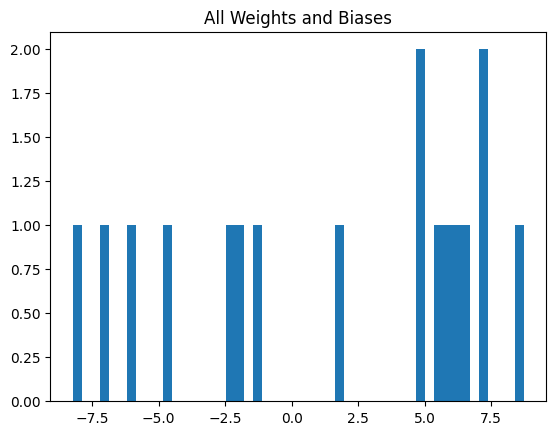

In [15]:

for i in range(1000):
    indices = np.random.choice(len(inputs), size=160, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    nn.train(inputs, labels, learning_rate)

#print(nn.forward_pass(inputs))
nn.plot_weights_and_biases()